In [0]:
!pip install rfpimp

  Created wheel for rfpimp: filename=rfpimp-1.3.4-cp36-none-any.whl size=10086 sha256=eabfc2e0e0d141cb9eba3649ef23b5f2ebb744ca0c63df46fddbd0af20e623c1
  Stored in directory: /root/.cache/pip/wheels/c7/35/67/4065afd69df4c0be693ecdec8a9c1433a23f80ee60395272ba
Successfully built rfpimp


In [0]:
!wget https://www.mlgraz.at/course_files/week4/loan.csv

--2020-04-16 14:58:16--  https://www.mlgraz.at/course_files/week4/loan.csv
Resolving www.mlgraz.at (www.mlgraz.at)... 81.19.159.92
Connecting to www.mlgraz.at (www.mlgraz.at)|81.19.159.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38013 (37K) [text/csv]
Saving to: ‘loan.csv’

loan.csv            100%[===================>]  37.12K  --.-KB/s    in 0.1s    

2020-04-16 14:58:17 (324 KB/s) - ‘loan.csv’ saved [38013/38013]



In [0]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from  sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from  sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import model_selection
import plotly.express as px

In [0]:
import rfpimp

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.



In [0]:
df = pd.read_csv("loan.csv")

# EDA

In [0]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**How many rows are there?**

In [0]:
df.Gender.isna().sum()

13

**How many Loans are there in total?**

In [0]:
df.Loan_ID.nunique()

614

**How many loans are accepted vs not?**

In [0]:
px.bar(data_frame=df, x="Loan_Status")

## Relationship with Loan Status

Relationship between Loan and Gender

In [0]:
px.histogram(df, x="ApplicantIncome", color="Loan_Status")

In [0]:
df.groupby(["Gender", "Loan_Status"]).count()["Loan_ID"]

# Dealing with Missing Values

**Impute Missing Values (except Column LoanAmount) with the most frequent Values**

In [0]:
categorical_columns_missing = ["Gender", "Married", "Dependents", "Credit_History", "Self_Employed", "Loan_Amount_Term"]
impute_missing=SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
df[categorical_columns_missing] = impute_missing.fit_transform(df[categorical_columns_missing])

**Impute LoanAmount with the mean**

In [0]:
impute_missing=SimpleImputer(missing_values=np.NaN, strategy='mean')
df["LoanAmount"] = impute_missing.fit_transform(df[["LoanAmount"]])

# Encoding Categorical Data

In [0]:
categorical_columns = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Loan_Status", "Credit_History", "Property_Area"]

**Set Datatype of Ordinal/Nominal Variables to Category**

In [0]:
for col in categorical_columns:
    df[col] = df[col].astype('category')

**Drop Loan ID**

In [0]:
df = df.drop("Loan_ID", axis=1)

**Create One Hot Encoding Features for the Categorical Variables**

In [0]:
df = pd.get_dummies(df, drop_first=True)

In [0]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,146.412162,360.0,1,0,0,0,0,0,0,1,0,1,1
1,4583,1508.0,128.000000,360.0,1,1,1,0,0,0,0,1,0,0,0
2,3000,0.0,66.000000,360.0,1,1,0,0,0,0,1,1,0,1,1
3,2583,2358.0,120.000000,360.0,1,1,0,0,0,1,0,1,0,1,1
4,6000,0.0,141.000000,360.0,1,0,0,0,0,0,0,1,0,1,1


**Rename Last Column to Load**

In [0]:
df.columns = list(df.columns.values[:-1]) + ["Loan"] 

# Split Input and Output

In [0]:
X = df[df.columns[:-1]]
y = df[df.columns[-1:]]

# Decision Tree

In [0]:
model=DecisionTreeClassifier()

In [0]:
model.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

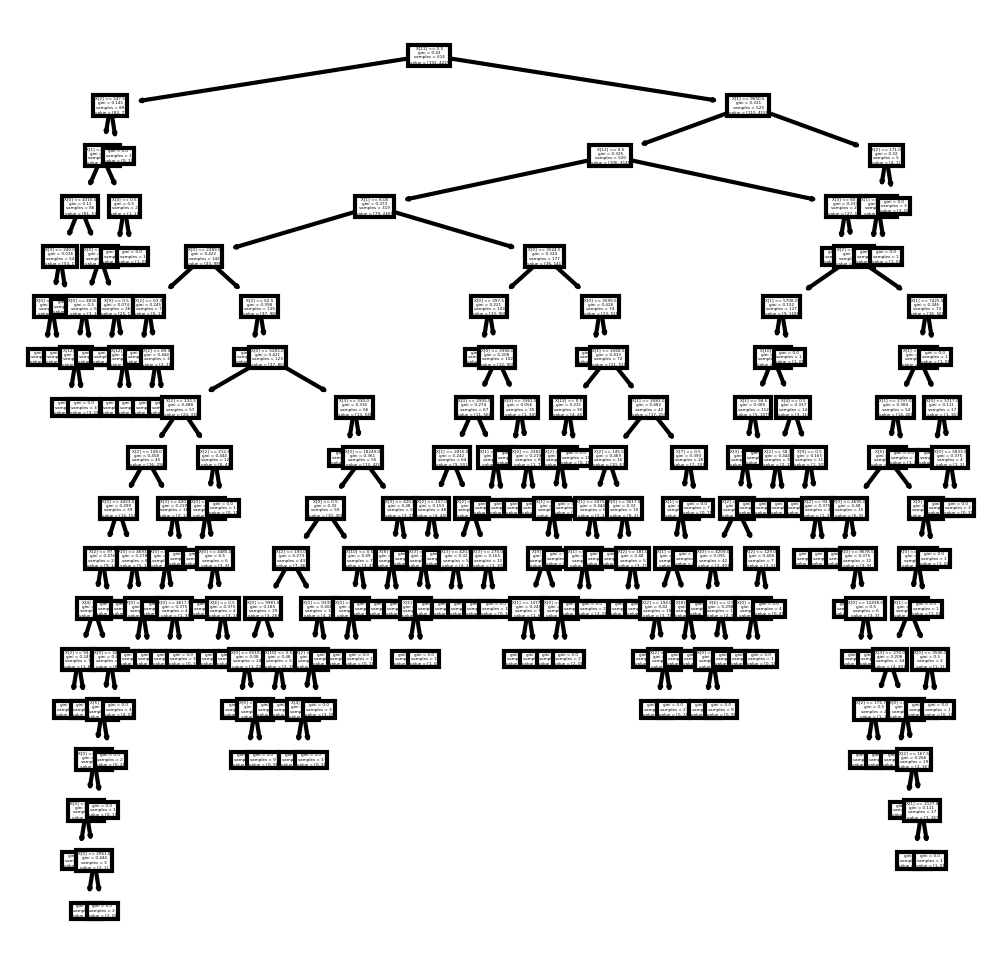

In [0]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model)
fig.savefig('tree.png')

In [0]:
model.score(X,y)

1.0

# Traint Test Split


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
model=DecisionTreeClassifier()
model.fit(X_train, y_train)

# Evaluation

In [0]:
y_pred = model.predict(X_test)


In [0]:
accuracy_score(y_test, y_pred)

In [0]:
precision_score(y_test, y_pred)

In [0]:
recall_score(y_test, y_pred)

In [0]:
f1_score(y_test, y_pred)

# K-Folds Cross Validation

In [0]:
model=DecisionTreeClassifier()
scores = cross_validate(model, X, y, cv=3, scoring=('accuracy', 'average_precision', 'recall','f1'))

In [0]:
scores

# Random Forest

In [0]:
rfc = RandomForestClassifier()
rfc_scores = cross_validate(rfc, X, y.values.ravel(), cv=3, scoring=('accuracy', 'average_precision', 'recall','f1'))

In [0]:
rfc_scores

In [0]:
report = pd.DataFrame(index=list(rfc_scores.keys())[2:], columns=['Decision Tree', 'Random Forest'])
for key in report.index:
  report.loc[key] = [np.mean(scores[key]), np.mean(rfc_scores[key])]

report['Improvment'] = report['Random Forest'] - report['Decision Tree']
report *= 100
report = report.astype(float).round(1)

In [0]:
report

# Feature Importance

In [0]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train.values.ravel())
importance = rfpimp.importances(rfc, X_test, y_test)
rfpimp.plot_importances(importance)

# Feature Engineering